#### This file contains quality check on the original dtseries, currently it only contains the temporal signal-to-noise ratio


In [1]:
import nibabel as nib
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.io as sio
import time, os, pickle, json
import matplotlib.pyplot as plt
import matplotlib as mpl
from os.path import join as pjoin

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams.update({'font.size': 12, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

In [2]:
# generate surface map for tSNR
def save_ciftifile(data, filename):
    template = '/nfs/z1/zhenlab/BrainImageNet/NaturalObject/data/bold/Analysis_derivatives/ciftify/sub-core02/MNINonLinear/Results/ses-ImageNet01_task-object_run-1/ses-ImageNet01_task-object_run-1_Atlas.dtseries.nii'
    ex_cii = nib.load(template)
    if len(data.shape) > 1:
        ex_cii.header.get_index_map(0).number_of_series_points = data.shape[0]
    else:
        ex_cii.header.get_index_map(0).number_of_series_points = 1
        data = data[np.newaxis, :]
    nib.save(nib.Cifti2Image(data.astype(np.float32), ex_cii.header), filename)
    
def tsnr(data):
    mean = data.mean(axis=-1)
    std = data.std(axis=-1)
    return np.nan_to_num(mean/std)

ses-action01_task-action_run-1 in sub-01
ses-action01_task-action_run-10 in sub-01
ses-action01_task-action_run-11 in sub-01
ses-action01_task-action_run-12 in sub-01
ses-action01_task-action_run-2 in sub-01
ses-action01_task-action_run-3 in sub-01
ses-action01_task-action_run-4 in sub-01
ses-action01_task-action_run-5 in sub-01
ses-action01_task-action_run-6 in sub-01
ses-action01_task-action_run-7 in sub-01
ses-action01_task-action_run-8 in sub-01
ses-action01_task-action_run-9 in sub-01
ses-action01_task-action_run-1 in sub-02
ses-action01_task-action_run-10 in sub-02
ses-action01_task-action_run-11 in sub-02
ses-action01_task-action_run-12 in sub-02
ses-action01_task-action_run-2 in sub-02
ses-action01_task-action_run-3 in sub-02
ses-action01_task-action_run-4 in sub-02
ses-action01_task-action_run-5 in sub-02
ses-action01_task-action_run-6 in sub-02
ses-action01_task-action_run-7 in sub-02
ses-action01_task-action_run-8 in sub-02
ses-action01_task-action_run-9 in sub-02
ses-action

<ipython-input-2-f2a45914d1fe>:15: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(mean/std)


ses-action01_task-action_run-1 in sub-05
ses-action01_task-action_run-10 in sub-05
ses-action01_task-action_run-11 in sub-05
ses-action01_task-action_run-12 in sub-05
ses-action01_task-action_run-2 in sub-05
ses-action01_task-action_run-3 in sub-05
ses-action01_task-action_run-4 in sub-05
ses-action01_task-action_run-5 in sub-05
ses-action01_task-action_run-6 in sub-05
ses-action01_task-action_run-7 in sub-05
ses-action01_task-action_run-8 in sub-05
ses-action01_task-action_run-9 in sub-05
ses-action01_task-action_run-1 in sub-06
ses-action01_task-action_run-10 in sub-06
ses-action01_task-action_run-11 in sub-06
ses-action01_task-action_run-12 in sub-06
ses-action01_task-action_run-2 in sub-06
ses-action01_task-action_run-3 in sub-06
ses-action01_task-action_run-4 in sub-06
ses-action01_task-action_run-5 in sub-06
ses-action01_task-action_run-6 in sub-06
ses-action01_task-action_run-7 in sub-06
ses-action01_task-action_run-8 in sub-06
ses-action01_task-action_run-9 in sub-06
ses-action

<ipython-input-3-2cbc7707b49b>:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(fig.get_yticks().astype(int), size = 15)


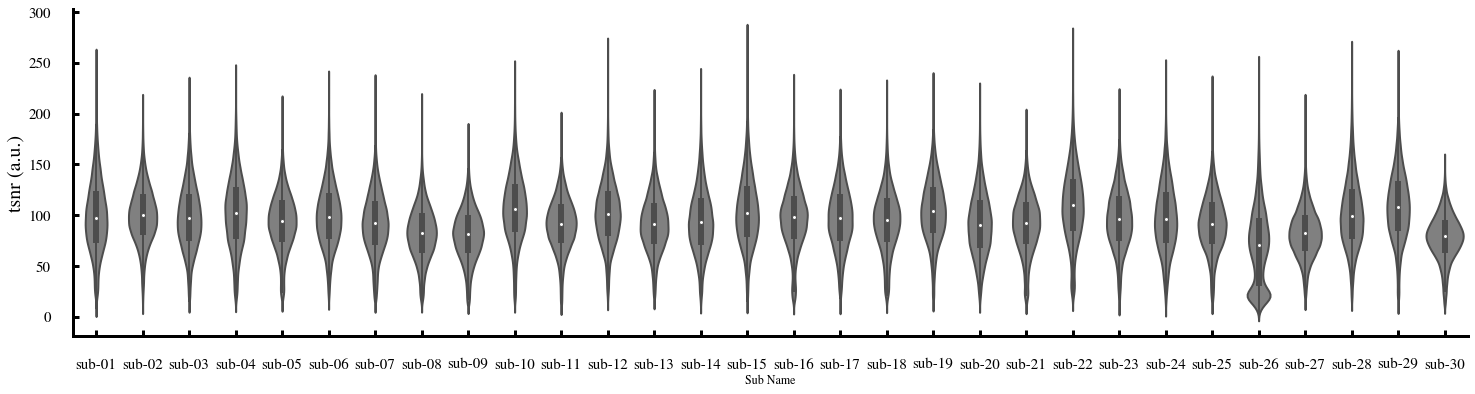

In [3]:
def get_time_series(sub_name, ciftify_dir, result_dir, n_run, roi_mat = None):

    # MNINolinear/Results disposit all the runs data
    _result_path = pjoin(ciftify_dir, sub_name, result_dir)
    # extract the action runs
    task = 'action' 
    data_runs = [_ for _ in os.listdir(_result_path) if ('action' in _) and (task in _) \
                    and ('discard' not in _) and int(_.split('-')[-1].split('_')[0])<=12]
    data_runs.sort() # sort() to be [1 10 11 12 2 -- 9]
    # initialize the mapping dict
    stim_resp_map = {}
    # loop run
    for single_run in data_runs[:n_run]:
        print(single_run + ' in ' + sub_name)
        # prepare .feat/GrayordinatesStats dir
        nii_dir = '{0}'.format(single_run)
        nii_path = pjoin(ciftify_dir, sub_name, result_dir, nii_dir)
        # loop trial 
        nii_file = pjoin(nii_path, '{0}_Atlas.dtseries.nii'.format(single_run))
        dt_data = nib.load(nii_file).get_fdata()
        if roi_mat:
            # only save roi
            stim_resp_map[single_run] = np.array(dt_data[:,roi_mat])
        else:
            stim_resp_map[single_run] = np.array(dt_data)
    # transfer to matrix
    time_series = np.dstack(tuple([stim_resp_map[_] for _ in list(stim_resp_map.keys())]))
    time_series = time_series.transpose((2,1,0)).astype(np.float32)
    return time_series
    
# load data
ciftify_dir = '/nfs/z1/userhome/ZhouMing/workingdir/BIN/action/data/bold/derivatives/ciftify'
result_dir = 'MNINonLinear/Results/'
beta_path = '/nfs/z1/zhenlab/BrainImageNet/action/data/bold/derivatives/beta'

n_run = 12
sub_names = sorted([i for i in os.listdir(beta_path) if i.startswith('sub-')]) 
# Violin plot of the tsnr distribution
df = pd.DataFrame()
tsnr_mean = np.zeros(1)

for sub_name in sub_names:
    # handle special subject
    tsnr_sub_path = pjoin(beta_path, sub_name, f'{sub_name}_action-tsnr.npy')
    if not os.path.exists(tsnr_sub_path):
        dtseries_sum = get_time_series(sub_name, ciftify_dir, result_dir, n_run)
        tsnr_sum = np.zeros_like(dtseries_sum[:,:,0])
        n_run = dtseries_sum.shape[0]   
        for run in range(n_run):
            run_data = dtseries_sum[run,:,:]
            tsnr_sum[run, :] = tsnr(run_data)
        tsnr_sub = tsnr_sum.mean(axis=0)
        np.save(tsnr_sub_path, tsnr_sub)
    else:
        tsnr_sub = np.load(tsnr_sub_path)
    # concatenate data
    tsnr_mean = np.concatenate((tsnr_mean, tsnr_sub[:59412]), axis=0)
# delete first value
tsnr_mean = np.delete(tsnr_mean, 0, axis=0).astype(np.float32)
label = np.repeat(sub_names, 59412)
# merge data and label into df
df['tsnr (a.u.)'] = tsnr_mean
df['Sub Name'] = label
plt.figure(figsize=(25, 6))

fig = sns.violinplot(x="Sub Name", y="tsnr (a.u.)", data=df, color='grey', linewidth=2)
fig.set_yticklabels(fig.get_yticks().astype(int), size = 15)
ax = plt.gca()

ax.tick_params(labelsize=15, width=3, length=6, direction="in", pad=22)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
plt.ylabel("tsnr (a.u.)", size = 20)

# save tsnr map
beta_path = '/nfs/z1/zhenlab/BrainImageNet/action/data/bold/derivatives/beta'
result_path = '/nfs/z1/userhome/ZhouMing/workingdir/BIN/action/utils/data_paper/result'

sub_names = sorted([i for i in os.listdir(beta_path) if i.startswith('sub-')]) 
tsnr_merge = np.zeros((30, 91282))
for idx,sub_name in enumerate(sub_names):
    tsnr_merge[idx] = np.load(pjoin(beta_path, sub_name, f'{sub_name}_action-tsnr.npy'))
tsnr_map = tsnr_merge.mean(axis=0)
save_ciftifile(tsnr_map, pjoin(result_path, 'tsnr_map_action.dtseries.nii'))
